<a href="https://colab.research.google.com/github/TacticalCoders/NLP-with-Pytorch/blob/main/6_1_RNN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **자연어 처리를 위한 시퀀스 모델링 - 초급**

시퀀스 sequence는 순서가 있는 항목의 모음이다. 

언어, 음성, 시계열처럼 한 데이터 항목이 앞뒤 항목에 의존하는 데이터를 **순차 데이터**(sequence data)라고 부른다.

사람의 언어에는 늘 순서 정보가 있다. 

음성은 음소(phoneme)라는 기본 단위의 연속이다. 

영어와 같은 문장에서 단어는 무작위로 나열되지 않고, 앞이나 뒤에 있는 단어의 제한을 받는다. 예를 들어 전치사 'of' 뒤에는 관사'the'가 올 가능성이 높다.

"The lino is the king of the jungle"

또한 영어를 포함한 많은 언어에서 문장의 주어가 단수인지 복수인지에 따라 동사가 달라진다.

"The book **is** on the table"

"The book**s** **are** on the table"

즉, 언어를 이해하려면 시퀀스를 반드시 이해해야 한다.

앞서 살펴본 합성곱 신경망과 같은 피드 포워드 신경망은 시퀀스를 적절하게 모델링하지 못한다.(적용할 수는 있다.)

그래서 사용하는 것이 바로 **순환신경망(RNN, Recurrent neural network)**이다.

## 순환 신경망(RNN)


시퀀스를 어떻게 모델링할 수 있을까?

바로 '상태 정보' 또는 **은닉 상태(hidden state)**라는 것을 유지함으로써 가능하다.

시퀀스에 있는 각 항목(문장의 단어)을 만나면서 은닉 상태를 업데이트한다. 그 결과로 만들어진 은닉 상태(일반적으로 벡터 하나)는 지금까지 시퀀스에서 본 모든 정보를 담는다. 이 은닉 상태를 **시퀀스 표현(sequence representation)**이라 부르며 이 벡터는 수많은 시퀀스 모델링 작업에 사용된다. 

RNN에는 여러 모델이 있다. 여기서는 가장 기본적 형태의 엘만 RNN(Elman RNN)만 다룰것이다. 

시퀀스 표현(sequence representation)을 학습하기 위해 시퀀스의 현재 상태를 감지하는 은닉 상태(hidden state) 벡터를 관리한다.

은닉 상태(hidden state) 벡터는 **현재 입력 벡터**와 **이전 은닉 상태 벡터**로 계산한다.

쉽게 말해, 은닉층의 노드에서 활성화 함수를 통해 나온 결과값(다음 타임스텝에서 사용할 은닉 벡터가 됨)을 출력층 방향으로도 보내면서 다시 은닉층 노드의 다음 계산의 입력으로 보내는 것이다. 마치 아래 왼쪽그림 처럼 말이다.

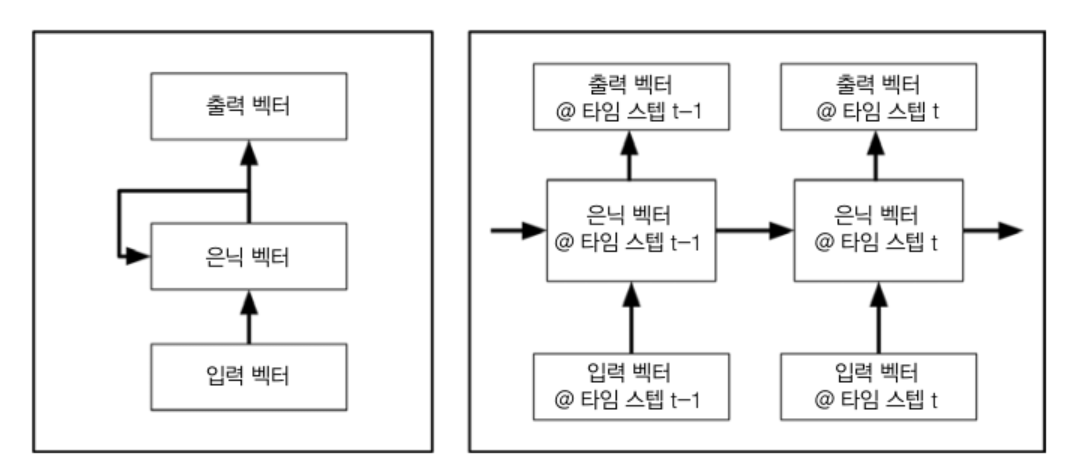

오른쪽 그림과 같이 펼친 표현을 BPTT(backpropagation through time)라고 한다.

**현재** 타임 스텝의 **입력** 벡터와 **이전** 타임 스텝의 **은닉** 벡터는 **현재** 타임 스텝의 은닉 상태 벡터에 매핑된다.

은닉-은닉 가중치 행렬을 사용해 이전 상태 벡터를 매핑하고 입력-은닉 가중치 행렬을 사용해 입력 벡터를 매핑하여 새로운 은닉 벡터를 계산한다.

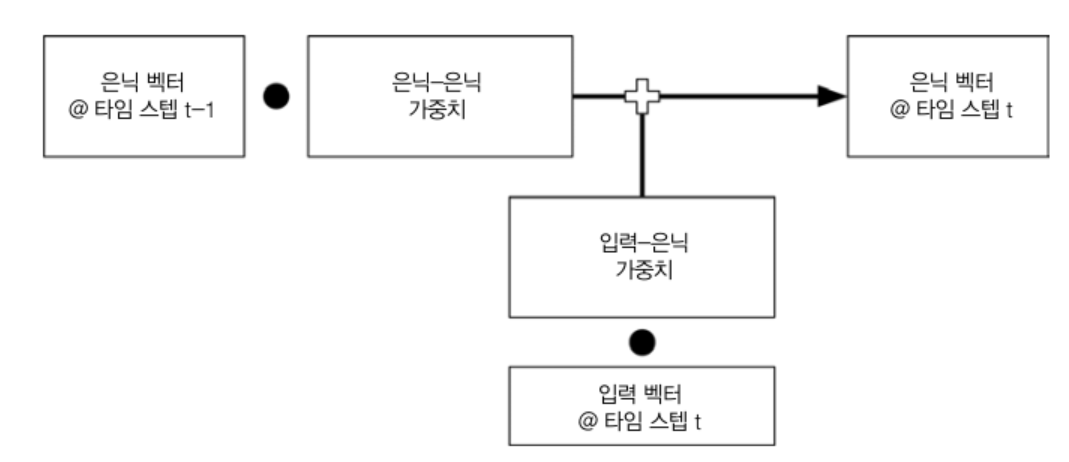

여기서 중요한 점은 은닉-은닉 가중치와 입력-은닉 가중치가 **연속된 타임 스텝에 걸쳐 공유**된다는 점이다. 그리고 훈련 과정에서 이런 가중치가 수정된다. 따라서 RNN은 현재 입력 정보와 지금까지 본 입력을 요약한 상태 표현을 사용하는 방법을 배운다. 이 상태 표현을 가지고 지금 어느 타입 스텝에 있는지 알 방법은 없다. 하지만 한 타임 스텝에서 다른 타임 스텝으로 이동하면서 손실 함수를 최소화하기 위해 상태 표현을 관리하는 방법을 학습한다.

이렇게 동일한 가중치(파라미터 공유)를 CNN에서도 사용했다. 커널이라는 동일한 파라미터를 사용해 입력 데이터의 부분 영역에서 출력을 계산했다. 합성곱 커널은 입력을 가로질러 이동하고 가능한 위치마다 출력을 계산해 **이동 불변성**을 학습한다.

반면 RNN은 같은 파라미터를 사용해 타임 스텝마다 출력을 계산한다. 이때 은닉 상태 벡터와 입력 벡터에 대한 출력을 계산한다. 이때 은닉 상태 벡터(지금까지 시퀀스 정보)에 의존해서 시퀀스의 상태를 감지한다. RNN의 목적은 주어진 은닉 상태 벡터와 입력 벡터에 대한 출력을 계산함으로 **시퀀스 불변성**을 학습하는 것이다. 

정리하자면 CNN은 공간에 따라 파라미터를 공유하고, RNN은 시간을 따라 파라미터를 공유한다.



단어와 문장은 길이가 매우 다양하다. = **가변 길이 시퀀스**(variable-length sequence)

모두 다른 크기의 길이를 어떻게 한 신경망에서 처리할 수 있을까?

시퀀스 길이를 인위적으로 동일하게 맞추는 방법이 있다.

이를 위해 마스킹(masking)이라는 기법을 사용할 것이다. 마스킹을 사용하면 어떤 입력이 그레이디언트나 최종 출력에 포함되어서는 안 될 때 신호를 보낼 수 있다. 

파이토치의 PackedSequence 클래스를 사용하면 된다.(일부 원소가 빈 텐서로 부터 밀집 텐서를 만들어줌)

## 엘만 RNN 구현하기

In [4]:
# 파이토치 RNNCell을 사용한 Elman RNN 구현
import torch.nn as nn

class ElmanRNN(nn.Module):
  def __init__(self, input_size, hidden_size, batch_first=False): # batch_first(bool) : 배치 차원이 0번째에 있는지
    # input_size(int) : 입력 벡터크기, hidden_size(int) : 은닉 상태 벡터 크기 
    super(ElmanRNN, self).__init__()
    self.rnn_cell = nn.RNNCell(input_size, hidden_size)

    self.batch_first = batch_first
    self.hidden_size = hidden_size

  def _initialize_hidden(self, batch_size):
    return torch.zeros((batch_size, self.hidden_size))

  def forward(self, x_in, initial_hidden=None): # x_in : 입력 데이터 텐서
    if self.batch_first: 
      batch_size, seq_size, feat_size = x_in.size() # batch_first가 True인 경우 입력 텐서의 0번째와 1번째 차원을 바꿈.
      x_in = x_in.permute(1,0,2)
    else:
      seq_size, batch_size, feat_size = x_in.size()
    
    hiddens = []

    if initial_hidden is None:
      initial_hidden = self._initialize_hidden(batch_size)
      initial_hidden = initial_hidden.to(x_in.device)

    hidden_t = initial_hidden

    for t in range(seq_size): # seq_size는 단어의 수 --> 타임스텝의 수 
      hidden_t = self.rnn_cell(x_in[t], hidden_t) # 타입 스텝마다 은닉 상태 벡터 계산
      hiddens.append(hidden_t) # 각 타임스텝마다의 은닉 상태 벡터를 수집하여 쌓아 놓는다.

    hiddens = torch.stack(hiddens)

    if self.batch_first:
      hiddens = hiddens.permute(1, 0, 2)
    return hiddens # 출력도 3차원 텐서이다. (배치에 있는 각 데이터 포인트와 타임 스텝에 대한 은닉 상태 벡터)

여기서 x_in으로 들어오는 텐서는 3차원이다.

batch_first가 True인 경우 -> batch_size, seq_size, feat_size 순서이다. 샘플(문장)의 수, 단어의 수, 각 단어의 임베딩 벡터 크기 순인 것이다.

batch_fisrtrk False인 경우 -> 단어의 수, 샘플의 수, 임베딩 벡터 크기의 수 순서이다. 이를 그림으로 표현해보면 다음과 같다.

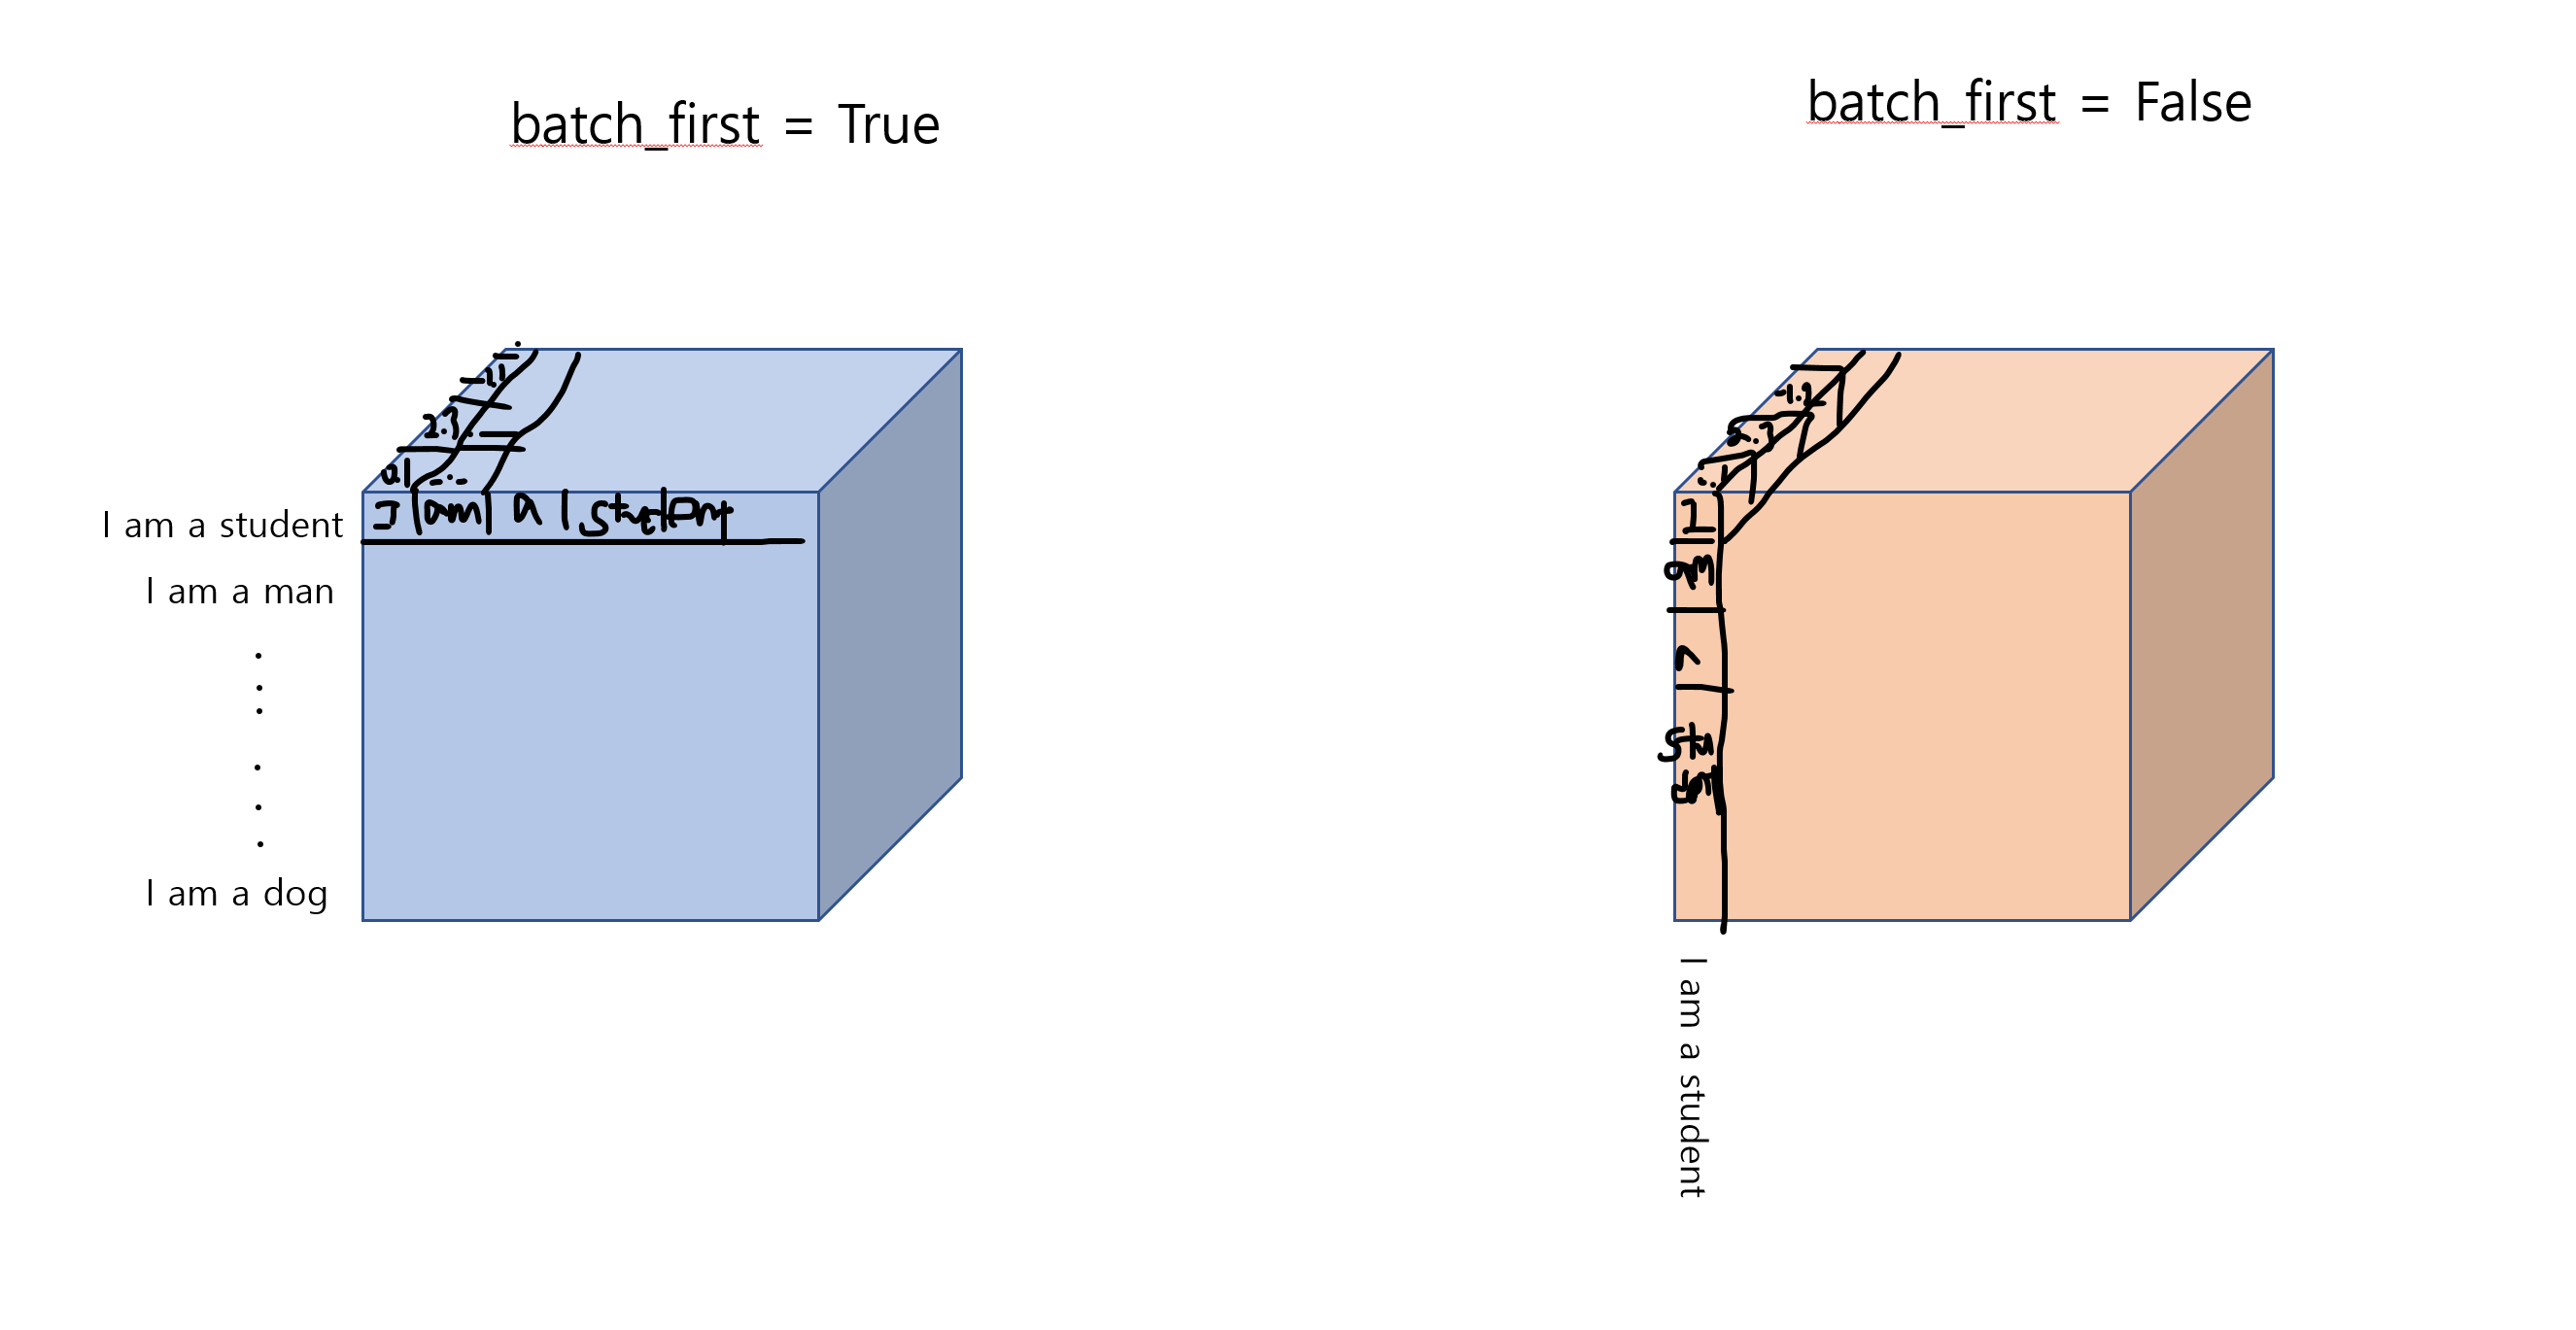